Sinusoidālā pozīciju kodēšana (d_model = 6):
       token  pos         d0         d1         d2         d3         d4         d5
0   Latvijas    0  +0.000000  +1.000000  +0.000000  +1.000000  +0.000000  +1.000000
1     izlase    1  +0.841471  +0.540302  +0.046399  +0.998923  +0.002154  +0.999998
2   uzvarēja    2  +0.909297  -0.416147  +0.092699  +0.995694  +0.004309  +0.999991
3   Igauniju    3  +0.141120  -0.989992  +0.138798  +0.990321  +0.006463  +0.999979
4   Latvijas    4  -0.756802  -0.653644  +0.184599  +0.982814  +0.008618  +0.999963
5     izlase    5  -0.958924  +0.283662  +0.230002  +0.973190  +0.010772  +0.999942
6   uzvarēja    6  -0.279415  +0.960170  +0.274909  +0.961470  +0.012926  +0.999916
7   Igauniju    7  +0.656987  +0.753902  +0.319225  +0.947679  +0.015080  +0.999886
8   Latvijas    8  +0.989358  -0.145500  +0.362852  +0.931847  +0.017235  +0.999851
9     izlase    9  +0.412118  -0.911130  +0.405699  +0.914007  +0.019389  +0.999812
10  uzvarēja   10  -0.544021  -

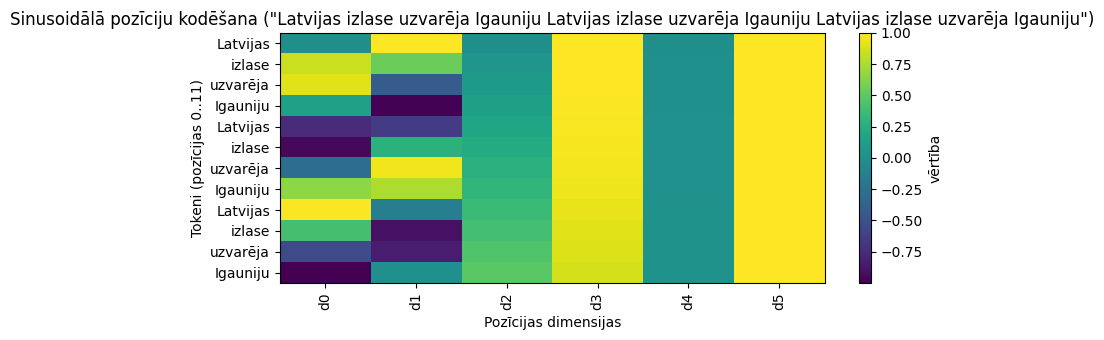

In [ ]:
# Attention is all you need: Sinusoidālā pozīciju kodēšana
# by Dmitry Yemelyanov, https://www.linkedin.com/in/dyemelyanov/

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sentence = "Latvijas izlase uzvarēja Igauniju Latvijas izlase uzvarēja Igauniju Latvijas izlase uzvarēja Igauniju"
tokens = sentence.split(" ")
positions = list(range(len(tokens)))

d_model = 6

def positional_encoding(pos: int, d_model: int) -> np.ndarray:
    """
    PE(pos, 2i)   = sin(pos / 10000^(2i/d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))
    """
    pe = np.zeros(d_model, dtype=np.float64)
    for i in range(d_model // 2):
        denom = 10000 ** (2 * i / d_model)
        pe[2 * i]     = math.sin(pos / denom)
        pe[2 * i + 1] = math.cos(pos / denom)
    return pe

rows = []
pe_matrix = []
for pos, tok in zip(positions, tokens):
    pe_vec = positional_encoding(pos, d_model)
    pe_matrix.append(pe_vec)
    rows.append({"token": tok, "pos": pos, **{f"d{j}": pe_vec[j] for j in range(d_model)}})

df = pd.DataFrame(rows)

print("Sinusoidālā pozīciju kodēšana (d_model = {}):".format(d_model))
with pd.option_context("display.width", 160, "display.max_columns", 200):
    display_df = df.copy()
    for j in range(d_model):
        display_df[f"d{j}"] = display_df[f"d{j}"].map(lambda x: f"{x:+.6f}")
    print(display_df)

pe_matrix = np.stack(pe_matrix, axis=0)  # shape: [seq_len, d_model]

plt.figure(figsize=(8, 3.5))
plt.imshow(pe_matrix, aspect="auto")
plt.colorbar(label="vērtība")
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.xticks(ticks=range(d_model), labels=[f"d{j}" for j in range(d_model)], rotation=90)
plt.title("Sinusoidālā pozīciju kodēšana (\"{}\")".format(sentence))
plt.xlabel("Pozīcijas dimensijas")
plt.ylabel("Tokeni (pozīcijas 0..{})".format(len(tokens)-1))
plt.tight_layout()
plt.show()
